<a href="https://colab.research.google.com/github/SowjanyaKiran/sowjanya-/blob/main/Credit_Card_Fraud_Detection_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [4]:
# Step 2: Load Dataset
df = pd.read_csv('/content/creditcard.csv')
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [5]:
# Step 3: Data Preprocessing
# Check for nulls
print(df.isnull().sum())

# Separate features and target
X = df.drop(['Class'], axis=1)
y = df['Class']

# Check and fix NaNs/infs in X
X.replace([np.inf, -np.inf], np.nan, inplace=True)
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

#Confirm the problem
print("Number of NaNs in y:", y.isnull().sum())

# Combine X and y into one DataFrame temporarily
df_clean = df.dropna(subset=['Class'])

# Now separate features and target again
X = df_clean.drop(['Class'], axis=1)
y = df_clean['Class']

X.replace([np.inf, -np.inf], np.nan, inplace=True)
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)


# Scale features to 0–1
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Number of NaNs in y: 0


In [6]:
# Step 4: Build ANN Model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output for binary classification
])

#model compiling
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,097 (16.00 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Step 5: Train the Model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    batch_size=100, epochs=10, verbose=1)

Epoch 1/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.8584 - loss: 0.2585 - val_accuracy: 0.9983 - val_loss: 0.0116
Epoch 2/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9983 - loss: 0.0114 - val_accuracy: 0.9983 - val_loss: 0.0106
Epoch 3/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9982 - loss: 0.0107 - val_accuracy: 0.9983 - val_loss: 0.0088
Epoch 4/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9982 - loss: 0.0094 - val_accuracy: 0.9984 - val_loss: 0.0067
Epoch 5/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9985 - loss: 0.0068 - val_accuracy: 0.9987 - val_loss: 0.0056
Epoch 6/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9987 - loss: 0.0058 - val_accuracy: 0.9989 - val_loss: 0.0050
Epoch 7/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9989 - loss: 0.0047 - val_accuracy: 0.9990 - val_loss: 0.0049
Epoch 8/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9990 - loss: 0.00

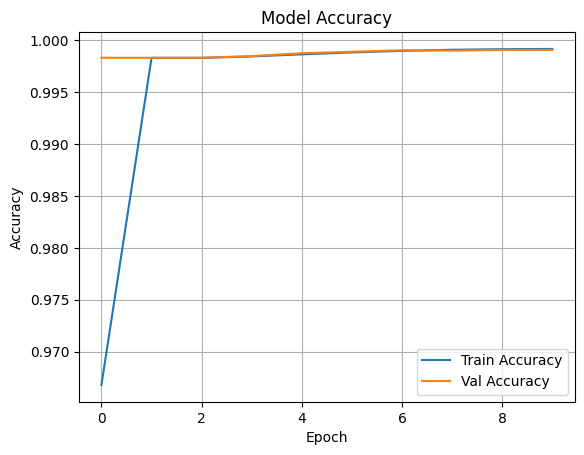

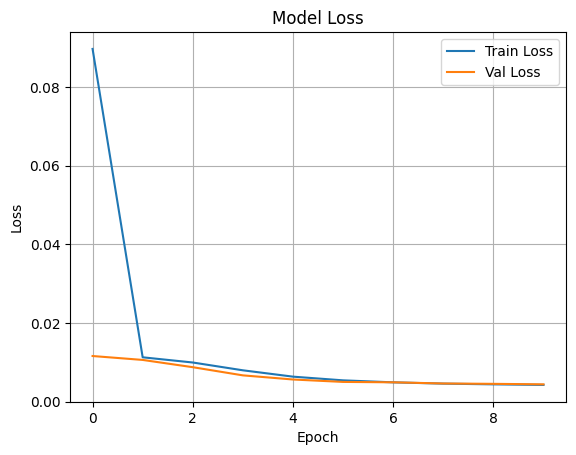

In [9]:
# Step 6: Plot Accuracy & Loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


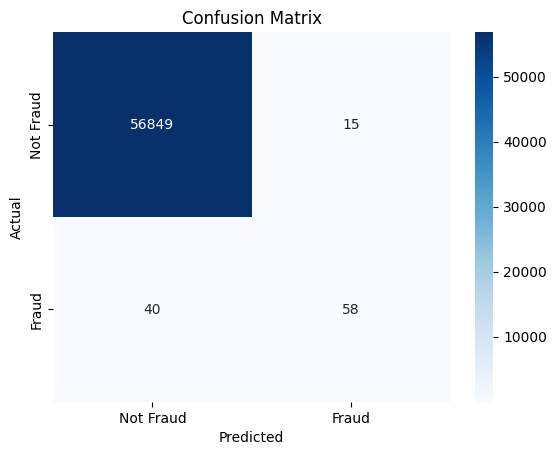

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.59      0.68        98

    accuracy                           1.00     56962
   macro avg       0.90      0.80      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [10]:
# Step 7: Model Evaluation
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

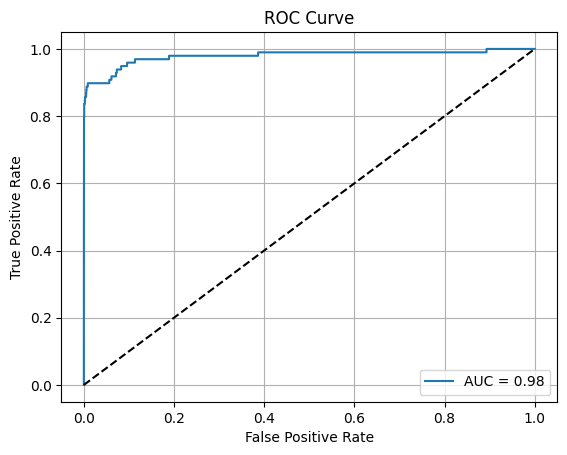

In [14]:
#Step 8: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
